<a href="https://colab.research.google.com/github/alishashaik1259/datascience_masters2021/blob/main/ADS_Assignment_244859_Alisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The main goal of this assignment is to study the time complexities of algorithms that are used for finding the similarities between documents theoretically and empirically. This report contains total 5 questions which deals with mainly 2 algorithms Jaccard_similarity and Cosine similarity and types in them. 

In [ ]:
pip install multiprocess

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#importing module
import nltk
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import time

import operator
from multiprocess import Pool
from collections import defaultdict

In [ ]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/alishashaik/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [ ]:
#getting the number of books in gutenberg corpus
from nltk.corpus import gutenberg
book_ids=gutenberg.fileids()
books={b:gutenberg.words(b) for b in book_ids}
len(books)

18

In [ ]:
#getting all the words from books and adding it to a list
gutenberg_corpus1=[]
for b in books.values():
    gutenberg_corpus1+=list(b)
    
len(gutenberg_corpus1)

2621613

In [ ]:
#displaying created gutenberg_corpus list of words
gutenberg_corpus1[:10]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

In [ ]:
#Creating unique words for worsr case scenarios
i=0
gutenberg_corpus=[]
for j in gutenberg_corpus1[0:500001]:
        
        j=j+str(i)
        i=i+1
        gutenberg_corpus.append(j)
        #print(j)

In [ ]:
#creating the documents with different word sizes
x = gutenberg_corpus[:500000]
docs=[]
chunks= len(x)
for i in range(500, 500000, 500):
  docs.append(x[i-500:i+i])

In [ ]:
#checking the document sizes
lengths=[]
for i in range(0,999):
  lengths.append(len(docs[i]))

print('Number of documents created', len(docs))
print('The lengths of documents are', lengths[:13])

Number of documents created 999
The lengths of documents are [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]


In [ ]:
#function which creates dictionaries of words and their frequencies
def make_dict(tokenlist):
    res_dict={}
    for token in tokenlist:
        res_dict[token]=res_dict.get(token,0)+1 
    return res_dict

Here you can see that the size bag of words matches the length of list from which it is created indicating all the words in the bag are unique.

In [ ]:
#creating bag of words with varying sizes
docdicts12=[]
for tokens in docs:
    docdicts12.append(make_dict(tokens))

print('Length of the parent list docs[0] is {} \nThe length of the bag of words docdicts12[0] is {}'.format(len(docdicts12[0]),len(docs[0])))
docdicts12[0]

Length of the parent list docs[0] is 1000 
The length of the bag of words docdicts12[0] is 1000


{'[0': 1,
 'Emma1': 1,
 'by2': 1,
 'Jane3': 1,
 'Austen4': 1,
 '18165': 1,
 ']6': 1,
 'VOLUME7': 1,
 'I8': 1,
 'CHAPTER9': 1,
 'I10': 1,
 'Emma11': 1,
 'Woodhouse12': 1,
 ',13': 1,
 'handsome14': 1,
 ',15': 1,
 'clever16': 1,
 ',17': 1,
 'and18': 1,
 'rich19': 1,
 ',20': 1,
 'with21': 1,
 'a22': 1,
 'comfortable23': 1,
 'home24': 1,
 'and25': 1,
 'happy26': 1,
 'disposition27': 1,
 ',28': 1,
 'seemed29': 1,
 'to30': 1,
 'unite31': 1,
 'some32': 1,
 'of33': 1,
 'the34': 1,
 'best35': 1,
 'blessings36': 1,
 'of37': 1,
 'existence38': 1,
 ';39': 1,
 'and40': 1,
 'had41': 1,
 'lived42': 1,
 'nearly43': 1,
 'twenty44': 1,
 '-45': 1,
 'one46': 1,
 'years47': 1,
 'in48': 1,
 'the49': 1,
 'world50': 1,
 'with51': 1,
 'very52': 1,
 'little53': 1,
 'to54': 1,
 'distress55': 1,
 'or56': 1,
 'vex57': 1,
 'her58': 1,
 '.59': 1,
 'She60': 1,
 'was61': 1,
 'the62': 1,
 'youngest63': 1,
 'of64': 1,
 'the65': 1,
 'two66': 1,
 'daughters67': 1,
 'of68': 1,
 'a69': 1,
 'most70': 1,
 'affectionate71': 1,


In [ ]:
#creating timeit function to record the run time of the algorithms
import time
import numpy as np

def timeit(somefunc,*args,repeats=10,**kwargs):

    times=[]

    while repeats>0:

        starttime=time.time() #starting timer 

        ans=somefunc(*args,**kwargs)

        endtime=time.time() #stopping timer

        timetaken=endtime-starttime #calculating the run time for each repeat

        times.append(timetaken) #appending it to times list

        repeats-=1

    mean=np.mean(times) #taking mean of times for n repeats

    stdev=np.std(times)

    error=stdev/(len(times)**0.5)

    return (ans, mean,error)

In [ ]:
#function used for plotting different plots.
def draw_graph(X,Y,similarity):
    x_val=[x for x in X]
    y_val=[y for y in Y]
    logx_val=[np.log10(x) for x in X]
    logy_val=[np.log10(y) for y in Y]
    
    plt.subplots_adjust(1,0,2.5,0.5)
    plt.subplot(121)
    #plt.figure(figsize=(4,6))
    plt.plot(x_val,y_val)
    if similarity in('Cosine similarity','Cosine numpy.dot similarity' ):
        plt.xlabel("Lengths of vectors of documents compared")
    elif similarity in('Jaccard all_pair', 'Cosine all_pair'):
        plt.xlabel("Number of docs compared")
    elif similarity in('MP_Jaccard all_pair', 'MP_Cosine all_pair'):
        plt.xlabel("Number of docs compared")
    else:
        plt.xlabel("Bag of words size")
    plt.ylabel("Average time(s)")
    if similarity in('Jaccard similarity','Cosine sparse similarity' ):
        plt.title("Running Time of "+ similarity)
    else:
        plt.title("Worst Case Running Time of "+ similarity)
    #plt.ylim(-6,-3)
    
    plt.subplot(122)
    #plt.figure(figsize=(4,6))
    plt.scatter(logx_val,logy_val)
    if similarity in('Cosine similarity','Cosine numpy.dot similarity' ):
        plt.xlabel("log(Lengths of vectors of documents compared)")
    elif similarity in('Jaccard all_pair', 'Cosine all_pair'):
        plt.xlabel("log(Number of docs compared)")
    elif similarity in('MP_Jaccard all_pair', 'MP_Cosine all_pair'):
        plt.xlabel("log(Number of docs compared)")
    else:
        plt.xlabel("log(Bag of words size)")
    plt.ylabel("log(Average time(s))")
    if similarity in('Jaccard similarity','Cosine sparse similarity' ):
        plt.title("Running Time of "+ similarity)
    else:
        plt.title("Worst Case Running Time of "+ similarity)
    plt.show()
    
    return x_val[:5], y_val[:5]


def slope_fun(x_val, y_val):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_val, y_val)
    slope_log, intercept_log, r_value_log, p_value_log, std_err_log = stats.linregress(np.log(x_val), np.log(y_val))
    print("Slope is {} and intercept is {}".format(slope,intercept))
    print("log_Slope is {} and log_intercept is {}".format(slope_log,intercept_log))
    print('slope_log rounded off to',round(slope_log, 4))
    print('intercept_log rounded off to',round(intercept_log, 4))

In [ ]:
def constant_estimate(intercept, simlilarity):
    constant=10**intercept
    print('The constant(ca) of my computer for {} would be approximately {}'.format(simlilarity,constant))

# 1. Jaccard’s similarity measure applied to large documents represented as bags of words




 
\begin{eqnarray*}
J=\frac{|A∩B|}{|A| +|B|−|A∩B|}
\end{eqnarray*}



The theoretical running time of Jaccard’s similarity measure of large documents represented as bags of words is O(n). The theoretical running time is also known as time complexity. It means the run time of Jaccard’s similarity measure is the size of the input for larger documents. Assume that dict1 and dict2 each hold n items and take O(n). Because there are two loops (for and if) in the below code, this is **$O{(n^2)}$** (O(n) and O(n)), but assuming there are no hash collisions, the 'if' statement only takes O(1) to execute, merely to check what is contained in the item's hash. As a result, the time complexity is **O(n)** (O(n) and O(1)) for Jaccard’s similarity measure applied to larger documents represented as bags of words.

The Empirical running time for the implementation of this algorithm matches the theoretical running time which is **O(n)**. The Order of n(slope) from the experiment below is near to **1**(1.0091) and the Intercept is approximately **-14 to -15** (-14.7205).

PS: The above mentioned values are subjected to change each time you run the cell, but the slope values will be approximately 1, and the intercept changes according to the computer on which the cell is executed. 

In [ ]:
#function for jaccard similarity
def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard(dict1,dict2):
    intersection={}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item]=min(dict1[item],dict2[item]) 
            
    intersectiontot=maketotal(intersection) #taking the intersection of the comapred docs
    union = maketotal(dict1)+maketotal(dict2)-intersectiontot #taking union of comapred docs
    return intersectiontot/union #returns the similarity score for compared documents



In [ ]:
#calculating the similarites of the consecutive documents of varying sizes
#timing the algorithm
xs=[] #contains size of bag of words of first document compared
ys=[] #contains mean time taken for each comparision

for index,n in enumerate(docdicts12[:100]):
    docA=docdicts12[index]
    docB=docdicts12[(index+1)]
    xs=xs+[len(docA)]
    (ans,mean,error)=timeit(jaccard,docA,docB,repeats=25)
    ys.append(mean)
    
print(xs[:10],ys[:10])

[1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500] [0.0003462696075439453, 0.0005894947052001953, 0.0014668655395507811, 0.0010650062561035156, 0.0013361930847167968, 0.0018212413787841797, 0.0016687583923339843, 0.001932239532470703, 0.002118234634399414, 0.0022789287567138673]


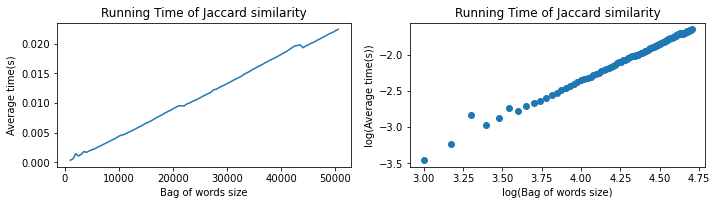

([1000, 1500, 2000, 2500, 3000],
 [0.0003462696075439453,
  0.0005894947052001953,
  0.0014668655395507811,
  0.0010650062561035156,
  0.0013361930847167968])

In [ ]:
draw_graph(xs,ys,'Jaccard similarity')

In [ ]:
slope_fun(xs,ys)

Slope is 4.496217989184783e-07 and intercept is -0.00011359649289666325
log_Slope is 1.0091383152883164 and log_intercept is -14.720535545412455
slope_log rounded off to 1.0091
intercept_log rounded off to -14.7205


### Estimation of Constants(Jaccard similarity) for my Computer

Here my slope is 1.0091 which is almost 1, so I am taking the order of my n as 1, which makes it O(n).
From the equation $𝑦=𝑐𝑎.𝑥^𝑛$, ca is constant and n is slope. After applying log, it becomes, log(𝑦)=log(𝑐𝑎)+𝑛log(𝑥), which is in the form of an equation of straight line y=mx+c, where m=slope and c= intercept.
According to this, from the above log graph, the empirical values are:
Intercept log10(ca)= -14.7205 and
slope n=1

So, the constant(ca) of my computer for Jaccard similarity would be approximately $10^{-14.7205}$ , which is nearly equal to 1.9032 × $10^{-15}$




In [ ]:
constant_estimate(-14.7205, 'Jaccard similarity')

The constant(ca) of my computer for Jaccard similarity would be approximately 1.9032682375763525e-15


# 2. Cosine similarity measure applied to documents represented as (dense representation) vectors


\begin{eqnarray*}
cos\theta=\frac{A\cdot B}{\sqrt{(A\cdot A) (B\cdot B)}}
\end{eqnarray*}

A dense representation of a bag of words is created by transforming texts into vectors with the frequencies of the words as vector values; if a word is not present in the bag of words, its vector value is set to 0. As a result, the dense representation of compared vectors will always be the same length. 

The theoretical worst case running time of the cosine similarity measure occurs when the documents in similarity comparision is completely unique, yielding a similarity score of 0(approx 0).The theoretical worst case running time of the cosine similarity measure applied to documents represented as (dense representation) vectors is O(n).This is because a single 'for' loop is iterated through arrays to calculate the dot product of each corresponding vectors of a document.Finally, the dot product results are divided by the magnitude of the documents. Based on this analysis, the theoritical worst case running time is about **O(n)** . Furthermore, it would be compared to the cosine function utilising the numpy dot product. In both these cases, **empirical runtime matches with theoritical run time** and constants for the computer are evaluated.

In [ ]:
#creating a function which transforms documents into vectors(dense representation)
def make_matrix(list_of_dicts):
    #first of all make a list of all of the features that occur in any document - these will be the dimensions of the matrix
    allfeatures={}    
    for docdict in list_of_dicts:
        for feat in docdict.keys():
            allfeatures[feat]=1
    
    dimensions=list(allfeatures.keys())
    #don't strictly need to sort it - but it is good practise to make sure it is reproducible
    sorted(dimensions)
    
    matrix=[]
    #each row in the matrix will be one of the dimensions
    for dimension in dimensions:
        row=[]
        #look up the appropriate value for each document
        for docdict in list_of_dicts:
            row.append(docdict.get(dimension,0)) #this will append the document's value if present, 0 otherwise
        matrix.append(row)
        
        
    return matrix

# it might be useful to be able to transpose a matrix so we can compare documents
def transpose(matrix):
    transposed=[]
    for i in range(0,len(matrix[0])):
        transposed.append([row[i] for row in matrix])
        
    return transposed

In [ ]:
#creating function which calculates cosine similarity of the documents
import math

def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]
        
    return total

def cosine(v1,v2):
    
    return dot(v1,v2)/math.sqrt(dot(v1,v1)*dot(v2,v2))

In [ ]:
'''As you can below, the vectots compared are all 1's and 0's indicating words in the compared bag of words are all unique, thus achieving the worst case scenario.

PS: For visualization purpose the vectors and their lengths of the last comparision in the loop is displayed.'''

"As you can below, the vectots compared are all 1's and 0's indicating words in the compared bag of words are all unique, thus achieving the worst case scenario.\n\nPS: For visualization purpose the vectors and their lengths of the last comparision in the loop is displayed."

In [ ]:
#calculating the similarites of the consecutive documents of varying sizes
#timing the algorithm
xs1=[] #contains size of comparing vectors 
ys1=[] #contains mean time taken for each comparision

for i in range(1,161,2):
  amatrixA=make_matrix(docdicts12[i-1:i+1])
  doc_vectorsA=transpose(amatrixA)
  A=doc_vectorsA[0]
  B=doc_vectorsA[1]
  doc1=len(A)
  xs1=xs1+[doc1]
  (ans,mean,error)=timeit(cosine,A,B,repeats=130)
  ys1.append(mean)

print('The length of the vectors compared are {} {} (last document) \n \nThe vectors compared are {} {} (last document)'.format(len(A),len(B),A[:30],B[:30]))

print(xs1[:10],ys1[:10])

The length of the vectors compared are 81000 81000 (last document) 
 
The vectors compared are [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] (last document)
[2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000] [0.0005213664128230169, 0.0007670897703904372, 0.0010503823940570538, 0.0013198192302997297, 0.0015817880630493164, 0.0018640261430006762, 0.002123566774221567, 0.002399752690241887, 0.0026731454409085788, 0.0029150082514836236]


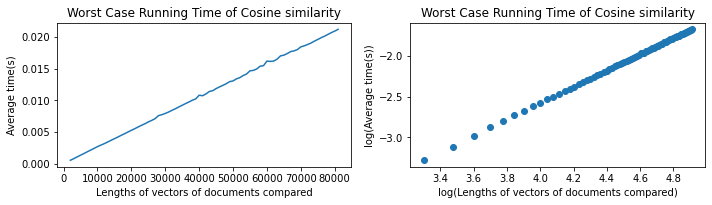

([2000, 3000, 4000, 5000, 6000],
 [0.0005213664128230169,
  0.0007670897703904372,
  0.0010503823940570538,
  0.0013198192302997297,
  0.0015817880630493164])

In [ ]:
draw_graph(xs1,ys1,'Cosine similarity')

In [ ]:
slope_fun(xs1,ys1)

Slope is 2.623263820094953e-07 and intercept is 3.0363507050528565e-05
log_Slope is 1.0001894742003399 and log_intercept is -15.152441938022852
slope_log rounded off to 1.0002
intercept_log rounded off to -15.1524


## Cosine similarity using numpy.dot 

In [ ]:
#creating a function to compute cosine similarity using numpy dot product.
def cosine_numpy(v1,v2):
    
    return np.dot(v1,v2)/math.sqrt(np.dot(v1,v1)*np.dot(v2,v2))

In [ ]:
#calculating the similarites of the consecutive documents of varying sizes
#timing the algorithm
xs2=[]  #contains size of comparing vectors
ys2=[]  #contains mean time taken for each comparision

for i in range(1,161,2):
  amatrixA=make_matrix(docdicts12[i-1:i+1])
  doc_vectorsA=transpose(amatrixA)
  A=doc_vectorsA[0]
  B=doc_vectorsA[1]
  doc1=len(A)
  xs2=xs2+[doc1]
  (ans,mean,error)=timeit(cosine_numpy,A,B,repeats=10)
  ys2.append(mean)

print('The length of the vectors compared are {} {} (last document) \n \nThe vectors compared are {} {} (last document)'.format(len(A),len(B),A[:30],B[:30]))
print(xs1[:10],ys1[:10])

The length of the vectors compared are 81000 81000 (last document) 
 
The vectors compared are [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] (last document)
[2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000] [0.0005213664128230169, 0.0007670897703904372, 0.0010503823940570538, 0.0013198192302997297, 0.0015817880630493164, 0.0018640261430006762, 0.002123566774221567, 0.002399752690241887, 0.0026731454409085788, 0.0029150082514836236]


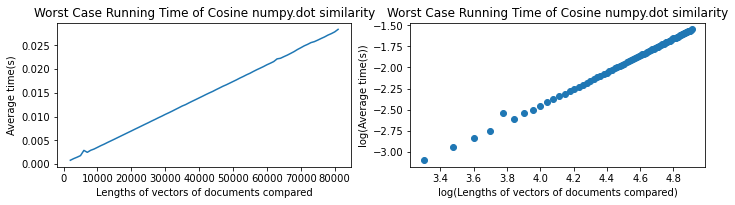

([2000, 3000, 4000, 5000, 6000],
 [0.0007925748825073243,
  0.0011430978775024414,
  0.0014369726181030274,
  0.0017675399780273438,
  0.002870464324951172])

In [ ]:
draw_graph(xs2,ys2,'Cosine numpy.dot similarity')

In [ ]:
slope_fun(xs2,ys2)

Slope is 3.4727120449774376e-07 and intercept is 4.9861589061561684e-05
log_Slope is 0.9765007246177583 and log_intercept is -14.618658544374757
slope_log rounded off to 0.9765
intercept_log rounded off to -14.6187


## Comparing the dot product cosine version in numpy with own implementation

Both np. dot product cosine and cosine data points are presented on a same graph for comparison. Both versions seems to have an increasing trend in run time as the size of input increases. The value of n in the case of the cosine np.dot product version is 0.9765, whereas the slope of the own implemented cosine is 1.001. As a result, the cosine np.dot product version is clearly superior to the latter. This difference may not be significant for smaller inputs (document sizes), but when the input size is too large, the cosine np.dot product version works significantly better.

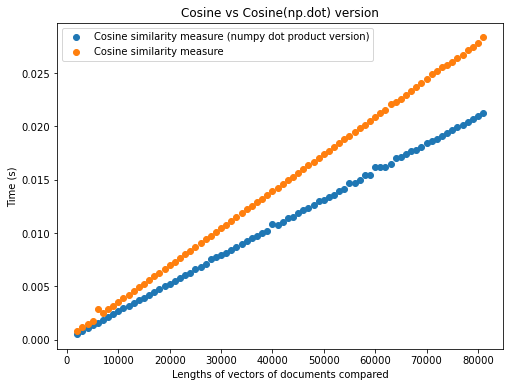

In [ ]:
#comparing cosine similarities numpy and non-numpy version 
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(xs1, ys1)
plt.scatter(xs2, ys2)
plt.legend(('Cosine similarity measure (numpy dot product version)','Cosine similarity measure'),loc='upper left')
plt.xlabel("Lengths of vectors of documents compared")
plt.ylabel("Time (s)")
plt.title("Cosine vs Cosine(np.dot) version")
plt.show()

In [ ]:
#calculating slope and intercept
import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(xs1, ys1)
slope_np, intercept_np, r_value_np, p_value_np, std_err_np = stats.linregress(xs2, ys2)
print("Cosine function is {} and intercept is {}".format(slope,intercept))
print("Numpy_version is {} and intercept is {}".format(slope_np,intercept_np))

Cosine function is 2.623263820094953e-07 and intercept is 3.0363507050528565e-05
Numpy_version is 3.4727120449774376e-07 and intercept is 4.9861589061561684e-05


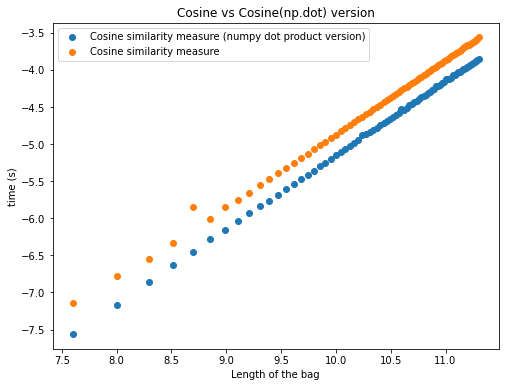

In [ ]:
#comparing cosine similarities numpy and non-numpy version (log)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(np.log(xs1), np.log(ys1))
plt.scatter(np.log(xs2), np.log(ys2))
plt.legend(('Cosine similarity measure (numpy dot product version)','Cosine similarity measure'),loc='upper left')
plt.xlabel("Length of the bag")
plt.ylabel("time (s)")
plt.title("Cosine vs Cosine(np.dot) version")
plt.show()

In [ ]:
#calculating slope and intercept
import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(xs1), np.log(ys1))
slope_np, intercept_np, r_value_np, p_value_np, std_err_np = stats.linregress(np.log(xs2), np.log(ys2))
print("Cosine function Slope is {} and intercept is {}".format(slope,intercept))
print("Numpy_version Slope is {} and intercept is {}".format(slope_np,intercept_np))

Cosine function Slope is 1.0001894742003399 and intercept is -15.152441938022852
Numpy_version Slope is 0.9765007246177583 and intercept is -14.618658544374757


### Estimation of Constants(Cosine vector and cosine numpy) for my Computer


The constant(ca) of my computer for Cosine similarity would be approximately $10^{-15.1524}$ , which is nearly equal to 7.0404 × $10^{-16}$.
and slope n is around 1.0001,which makes it O( 𝑛1.0001 ). Similarly, constants for cosine numpy.dot product version is estimated.

In [ ]:
constant_estimate(-15.1524,'Cosine vector')

The constant(ca) of my computer for Cosine vector would be approximately 7.040443214699753e-16


The constant(ca) of my computer for Cosine np.dot product version similarity would be approximately $10^{-14.6186}$ , which is nearly equal to 2.4065 × $10^{-15}$ and slope n is around 0.97,which makes it O($n^{0.97}$).

In [ ]:
constant_estimate(-14.6186,'Cosine np.dot product version')

The constant(ca) of my computer for Cosine np.dot product version would be approximately 2.4065783201116014e-15


# 3. Cosine similarity directly from sparse (dictionary) representations without converting them into dense (vector) representations

In sparse representation, the documents which are in the form of bag of words are directly taken as input to the function, and the similarity is calculated. The output below displays the inputs and the lengths of input that are being supplied as input to the sparse function. Here the input is python dictionary/bag of words and are not vectors.

In [ ]:
#creating function which calculates cosine similarity of the documents of sparse representation
def cosine_sparse(dict1,dict2):
  v1=[]
  v2=[]  
  total=0
  for item in dict1.keys():
    v1.append(dict1[item])  #collecting word frequencies of each word from first doc and appending to v1
  for item1 in dict2.keys():
    v2.append(dict2[item1])  #collecting word frequencies of each word from second doc and appending to v2
  return dot(v1,v2)/math.sqrt(dot(v1,v1)*dot(v2,v2))
  

In [ ]:
#calculating the similarites of the consecutive documents of varying sizes
#timing the algorithm
xs3=[]  #contains size of bag of words of first document compared
ys3=[]  #contains mean time taken for each comparision

for index,n in enumerate(docdicts12[68:149]):
    docA=docdicts12[68+index]
    docB=docdicts12[(68+index+1)]
    xs3=xs3+[len(docA)]
    (ans,mean,error)=timeit(cosine_sparse,docA,docB,repeats=50)
    ys3.append(mean)

print('The length of the bags compared are {} {} (last document) \nThe bags compared are {} {} (last document)'.format(len(docA),len(docB),docA,docB))
print(xs3[:10],ys3[:10])

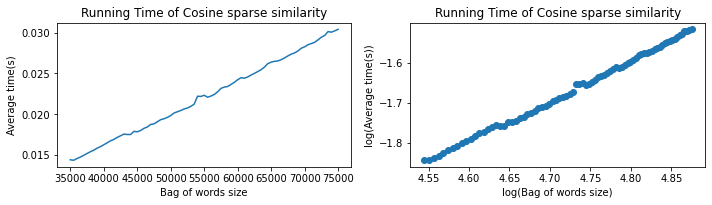

([35000, 35500, 36000, 36500, 37000],
 [0.014414148330688476,
  0.014356851577758789,
  0.014565291404724122,
  0.014748005867004395,
  0.014959144592285156])

In [ ]:
draw_graph(xs3,ys3,'Cosine sparse similarity')

In [ ]:
slope_fun(xs3,ys3)

Slope is 4.0451719315071417e-07 and intercept is -0.00012606480149611465
log_Slope is 0.9973481059644103 and log_intercept is -14.69742759046665
slope_log rounded off to 0.9973
intercept_log rounded off to -14.6974


### Estimation of Constants(Cosine Sparse) for my Computer

The constant(ca) of my computer for Cosine sparse similarity would be approximately $10^{-14.6974}$ , which is nearly equal to 2.0072 × $10^{-15}$ and slope n is around 1(0.9973), which makes it O(n).

In [ ]:
constant_estimate(-14.6974,'Cosine Sparse')

The constant(ca) of my computer for Cosine Sparse would be approximately 2.0072432216432944e-15


## Testing function for correctness and comparing its efficiency theoretically and empirically with previous implementation of the cosine similarity, and Jaccard’s measure.

**Empirical Comparision**

From the below graph, cosine sparse similarity takes more run time than cosine vector and cosine np.dot version, and it takes less time than jaccard. But according to slopes, sparse is slightly efficient than jaccard and cosine vector and slightly less efficient than cosine np.dot version, which means for documents of larger sizes, cosine sparse is more efficient than jaccard and cosine vector.

**Theoretical comparision**

Coming to the theory, the time complexity of all 4 algorithms are of O(n). But if there are hash collisions in jaccard similarity, the order of it is ${O(n^2)}$. Just in this case, cosine sparse and other 2 algorithms are more efficient. 

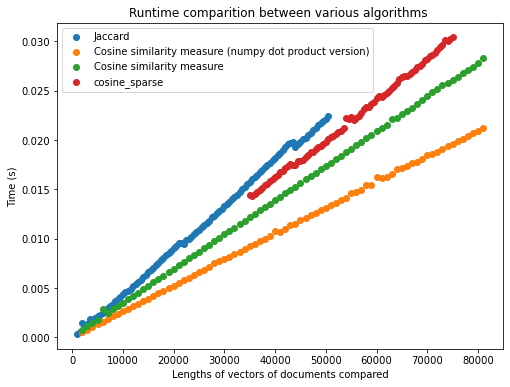

In [ ]:
#comparision between, jaccard, cosine, cosine numpy version, and cosine sparse
plt.figure(figsize=(8,6))
plt.scatter(xs, ys)
plt.scatter(xs1, ys1)
plt.scatter(xs2, ys2)
plt.scatter(xs3, ys3)
plt.legend(('Jaccard','Cosine similarity measure (numpy dot product version)','Cosine similarity measure','cosine_sparse'),loc='upper left')
plt.xlabel("Lengths of vectors of documents compared")
plt.ylabel("Time (s)")
plt.title("Runtime comparition between various algorithms ")
plt.show()

In [ ]:
#calculating slope and intercept
import scipy.stats as stats
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(np.log(xs), np.log(ys))
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(np.log(xs1), np.log(ys1))
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(np.log(xs2), np.log(ys2))
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(np.log(xs3), np.log(ys3))
print("Jaccard function Slope is {} and intercept is {}".format(slope1,intercept1))
print("Cosine Slope is {} and intercept is {}".format(slope2,intercept2))
print("Cosine_np.dot Slope is {} and intercept is {}".format(slope3,intercept3))
print("Cosine_sparse Slope is {} and intercept is {}".format(slope4,intercept4))

Jaccard function Slope is 1.0091383152883164 and intercept is -14.720535545412455
Cosine Slope is 1.0001894742003399 and intercept is -15.152441938022852
Cosine_np.dot Slope is 0.9765007246177583 and intercept is -14.618658544374757
Cosine_sparse Slope is 0.9973481059644103 and intercept is -14.69742759046665


# 4. All-pairs similarities for a collection of documents

All pair similarity means when a collection of documents are sent as input to the similarity algorithm, the output should be similarity of all pairs in the collection. For example if the input is [doc11,doc2,doc3], the out shouls return similarities of all pairs i.e [(doc1,doc1),(doc1,doc2),(doc1,doc3),(doc2,doc1),(doc2,doc2),(doc2,doc3),...].

The function below takes list of dictionaries/bag of words and type of similarity measure as input and returns all pair similarities.

In [ ]:
#creating function which computes all similarities of inputed documents
def all_sim(docdicts, similarity):
  sims=[]
  if similarity==jaccard:
    for docA in docdicts:
        rowsims=[]
        for docB in docdicts:
            rowsims.append(similarity(docA,docB))
        sims.append(rowsims)
  elif similarity==cosine:
    amatrix=make_matrix(docdicts)
    doc_vectors=transpose(amatrix)
    for docA in doc_vectors:
        rowsims=[]
        for docB in doc_vectors:
          rowsims.append(similarity(docA,docB))
        sims.append(rowsims)

  return(sims)

#testing my all_sim function
print('Cosine similarity Output \n', all_sim(docdicts12[:3], cosine))
print('Jaccard similarity Output \n', all_sim(docdicts12[:3], jaccard))

Cosine similarity Output 
 [[1.0, 0.4082482904638631, 0.0], [0.4082482904638631, 1.0, 0.5773502691896258], [0.0, 0.5773502691896258, 1.0]]
Jaccard similarity Output 
 [[1.0, 0.25, 0.0], [0.25, 1.0, 0.4], [0.0, 0.4, 1.0]]


## The theoretical worst-case running time for computing all-pairs similarities

### Jaccard

From the function `all_sim` if the similarity is 'Jaccard' and the documents are unique, there are two `for` loops out of which, in the second for loop, the jaccard function is called, the jaccard function has a for loop inside it(assuming no hash collisions) making a total of 3 for loops of order n in big O notation (O(n)) each. Hence the theoretical worst case runtime for jaccard for all pair similarities is ${O(n^3)}$. The if statements in the function `all_sim` is just an conditional statement and hence it has an order of 1, O(1).

### Cosine

For cosine, there are 2 `for` loops in which a cosine function is called in 2nd for loop. Cosine function in turn calls `dot` function which has a for loop inside it making a total of 3 for loops for similarity comparision. These 3 for loops has an order of n in big O notation (O(n)) each. And hence theoretical worst case runtime(all unique docs) for cosine for all pair similarities is ${O(n^3)}$.

## Jaccard all_pair

In [ ]:
#calculating all similarites of the consecutive documents of varying sizes
#timing the algorithm
x1=[] #contains input number of docs for all similarities
y1=[] #contains mean time taken 

for i in range(1,30):
  x1.append(i)
  (ans,mean,error)=timeit(all_sim,docdicts12[:i],jaccard,repeats=3)
  y1.append(mean)

print(x1[:10],y1[:10])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.0017219384511311848, 0.0034085909525553384, 0.005900382995605469, 0.012248039245605469, 0.015022754669189453, 0.02282436688741048, 0.03400603930155436, 0.048602660497029625, 0.06704799334208171, 0.08902907371520996]


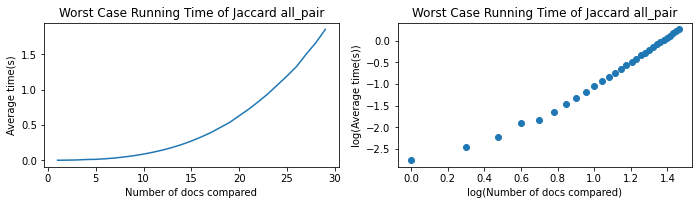

([1, 2, 3, 4, 5],
 [0.0017219384511311848,
  0.0034085909525553384,
  0.005900382995605469,
  0.012248039245605469,
  0.015022754669189453])

In [ ]:
draw_graph(x1,y1,'Jaccard all_pair')

In [ ]:
'''30 Documents is a very small size for input, as you can see below, for this small input itself the order of n starts to increase from 2.It will eventually reach theoretical value 3 ${O(n^3)}$ for larger number of documents.'''

'30 Documents is a very small size for input, as you can see below, for this small input itself the order of n starts to increase from 2.It will eventually reach theoretical value 3 ${O(n^3)}$ for larger number of documents.'

In [ ]:
slope_fun(x1,y1)

Slope is 0.06087750319776863 and intercept is -0.4065182853019098
log_Slope is 2.311038032004556 and log_intercept is -7.47394336294777
slope_log rounded off to 2.311
intercept_log rounded off to -7.4739


## Cosine all_pair

In [ ]:
#calculating all similarites of the consecutive documents of varying sizes
#timing the algorithm
x2=[]  #contains input number of docs for all similarities
y2=[]  #contains mean time taken 
#try:

for i in range(1,20):
  x2.append(i)
  (ans,mean,error)=timeit(all_sim,docdicts12[:i],cosine,repeats=3)
  y2.append(mean)

print(x2[:10],y2[:15])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.003312349319458008, 0.0075117746988932295, 0.013549089431762695, 0.02036706606547038, 0.036266326904296875, 0.06083202362060547, 0.09453042348225911, 0.13906137148539224, 0.6335842609405518, 0.26514999071757, 0.35099371274312335, 0.45814768473307294, 0.8481842676798502, 0.7141003608703613, 0.8692417939503988]


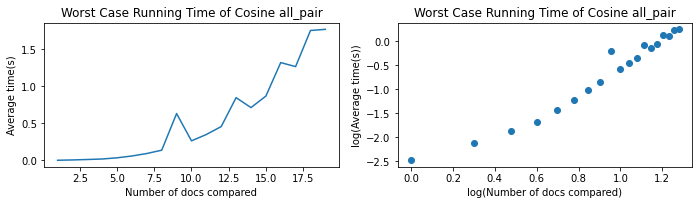

([1, 2, 3, 4, 5],
 [0.003312349319458008,
  0.0075117746988932295,
  0.013549089431762695,
  0.02036706606547038,
  0.036266326904296875])

In [ ]:
draw_graph(x2,y2,'Cosine all_pair')

In [ ]:
slope_fun(x2,y2)

Slope is 0.09799525598336382 and intercept is -0.42055612976788104
log_Slope is 2.3800598173701544 and log_intercept is -6.604209697595408
slope_log rounded off to 2.3801
intercept_log rounded off to -6.6042


## Estimation of runtime of algorithms to compute all-pairs similarities for 200K documents

In order to compute the runtime, we need to compute the value of y from the equation $𝑦=𝑐𝑎.𝑥^𝑛$. ca is constant of the computer , x is the number of documents provided as input for all similarity, which is 200k(200000) in this case, and n is the order of n in big O notation, which is also known as slope. By substituting these values into the equation, we will get the required runtime(y). 

In [ ]:
#function for runtime estimation
def estimate_runtime(ca,x,n,sim):
    y=round(ca*(x**n),2)
    y_min=round(y/60, 2)
    y_hrs=round(y_min/60, 2)
    print('Estimation of runtime of {} to compute all-pairs similarities for 200K documents is {} seconds'.format(sim,y))
    print('Estimation of runtime of {} to compute all-pairs similarities for 200K documents is {} minutes'.format(sim,y_min))
    print('Estimation of runtime of {} to compute all-pairs similarities for 200K documents is {} hours'.format(sim,y_hrs))
    

## Empirical estimation

### Jaccard

The slope(n) of Jaccard all_pair is 2.311, which makes it runtime as $𝑂(𝑛^{2.3})$ and the constant is 3.3581 × $10^{-8}$

In [ ]:
constant_estimate(-7.4739,'Jaccard all_pair')

The constant(ca) of my computer for Jaccard all_pair would be approximately 3.3581492958644195e-08


In [ ]:
estimate_runtime(10**(-7.4739),200000,2.311,'Jaccard')

Estimation of runtime of Jaccard to compute all-pairs similarities for 200K documents is 59810.9 seconds
Estimation of runtime of Jaccard to compute all-pairs similarities for 200K documents is 996.85 minutes
Estimation of runtime of Jaccard to compute all-pairs similarities for 200K documents is 16.61 hours


### Cosine

The slope(n) of Cosine all_pair is 2.3801 which is approximately 2, which makes it runtime as $𝑂(𝑛^{2.3})$ and the constant is 2.4877 × $10^{-7}$

In [ ]:
constant_estimate(-6.6042,'Cosine all_pair')

The constant(ca) of my computer for Cosine all_pair would be approximately 2.4877114210033104e-07


In [ ]:
estimate_runtime(10**(-6.6042),200000,2.3801,'Cosine')

Estimation of runtime of Cosine to compute all-pairs similarities for 200K documents is 1029867.83 seconds
Estimation of runtime of Cosine to compute all-pairs similarities for 200K documents is 17164.46 minutes
Estimation of runtime of Cosine to compute all-pairs similarities for 200K documents is 286.07 hours


In [ ]:
'''Please note that the above 2 estimations are based on the order of n(2.3) for smaller number of documents(30). But ideally, for 200k documents the n value will be 3, since the input is very large. If this can be considered, the runtime for jaccard and cosine can be computed with n value as 3.'''

'Please note that the above 2 estimations are based on the order of n(2.3) for smaller number of documents(30). But ideally, for 200k documents the n value will be 3, since the input is very large. If this can be considered, the runtime for jaccard and cosine can be computed with n value as 3.'

## Does it matter what the similarity measure is?

Yes, it does matter what similarity measure is being used. From the above runtime analysis for 200k documents, it was proved that jaccard all similarity algorithm outperforms cosine algorithm. Hence, in case of larger inputs the most efficeint algorithm, which is jaccard in this case, should be used.

# 5. All-pairs similarities for documents Using some form of parallel computing

MapReduce is a distributed computing processing technology and programme architecture . Map and Reduce are two fundamental tasks in the MapReduce algorithm. Map turns a set of data into another set of data by breaking down individual elements into tuples (key/value pairs). Second, there's the reduction job, which takes the result of a map as an input and condenses the data tuples into a smaller set. The reduction work is always executed after the map job, as the name MapReduce suggests.MapReduce's main advantage is that it's simple to expand data processing over several computing nodes.It is possible in a distributed network where number of computers are connected together,but in the case of a single computer system, the mapper tasks are distubuted betwen the number of cores in the computer using multiprocess library.In my case, my computer has a total of 8 cores. The data processing primitives of the MapReduce model are known as mappers and reducers. 

Here, for the all pair similarity computation, a mapper function `mapper_parallel` and 2 reducer functions`reducer_parallel_jaccard` and `reducer_parallel_cosine`(one for jaccard and other for cosine) are created. The mapper function simply forms a tuples (key/value pairs) of my individual data, i.e if my input is 3 documents, it creates key value pairs like below, where 0,1,2 are the document indexes.


[('[0, 0]', [[0, 0], [0, 1], [0, 2]]),
 ('[1, 0]', [[1, 0], [1, 1], [1, 2]]),
 ('[2, 0]', [[2, 0], [2, 1], [2, 2]])]
 
The first tuple ('[0, 0]', [[0, 0], [0, 1], [0, 2]]), corresponds to all pairs with the number of input documents, where [0,1] means comparision of 0 and 1 documents.so, if there are n number of documents the mapper will create n tuples which has values as 'all pairs'. This output of the mapper function is sent to corresponding reducer function, which calculates the similarities of documents in the order returned by the mapper.

So far, we have divided our tasks, but that does not mean there will be any effect on runtime. To cut the runtime and make the function efficient, we need to assign the mapper task to more than 1 node/core, where each core assigned with mapper task behaves as a mapper and the huge number of documents are distributed among the specified mappers and processing of the distributed inputs are done in parallel. In a similar way, we can assign reducer job to more than one node/core, where the mapper outputs are distributed among reducers and perform all similarities in a parallel way.

To achieve this parallel computing, a function called `map_reduce_parallel` is created, which takes documents, mapper, reducer, number of mappers and number of reducers as inputs and returns the all_pair similarities of documents.
 

In [ ]:
def all_pair(documents):
    all_sim= []
    for i in range(len(documents)):
        all_sim.append([])
        for j in range(0, len(documents)):
            all_sim[i].append([i,j])
    return all_sim

In [ ]:
def mapper_parallel(sim_list):
     output=[]
     for num in sim_list:
        output.append((str(num[0]),num))
     return output   

In [ ]:
#Jaccard similarity reducer  function
def reducer_parallel_jaccard(sim_list):
    output=[]
    (word,counts)=sim_list 
    for count in counts: 
        docA=docdicts12[count[0]]
        docB=docdicts12[count[1]]
        union = docA.keys() | docB.keys()
        Intersection = docA.keys() & docB.keys()
        jaccard_similarity =  len(Intersection) / len(union)
        output.append(((count[0],count[1]),jaccard_similarity))
    return output

In [ ]:
#cosine similarity sparse reducer  function
def reducer_parallel_cosine(sim_list):
    output=[]
    (word,counts)=sim_list 
    for count in counts: 
        docA=docdicts12[count[0]]
        docB=docdicts12[count[1]]
        numerator = dot_product(docA,docB)
        denominator = sqrt(dot_product(docA,docA)*dot_product(docB,docB))
        cosine_similarity=numerator/denominator
        output.append(((count[0],count[1]),cosine_similarity))
    return output

In [ ]:
from collections import defaultdict
from multiprocess import Pool
def map_reduce_parallel(doc,mapper,reducer,mapprocesses=4,reduceprocesses=4):
  outputs=[]
  collector=defaultdict(list)  #this dictionary is where we will store intermediate results
                                 #it will map keys to lists of values (default value of a list is [])
                                 #in a real system, this would be stored in individual files at the map nodes
                                 #and then transferred to the reduce nodes
        
  processed_doc=all_pair(doc)
  #mapprocesses=4
  #reduceprocesses=4
  mappool = Pool(processes=mapprocesses)
    
  #map stage
  mapresults=mappool.map(mapper,processed_doc)
  mappool.close()
  for mapresult in mapresults:
    for (key, value) in mapresult:     #pass each input to the mapper function and receive back each key,value pair yielded
      collector[key].append(value)     #append the value to the list for that key in the intermediate store

  #reduce stage
  reducepool = Pool(processes=reduceprocesses)
  reduceresults=reducepool.map(reducer,collector.items())
  reducepool.close()
  for reduceresult in reduceresults:
    outputs+=reduceresult
  return outputs

In [ ]:
def my_func_all_sim(docdicts,similarity):
  sims=[]
  if similarity==jaccard:
    for docA in docdicts:
        rowsims=[]
        for docB in docdicts:
            union = docA.keys() | docB.keys()
            Intersection = docA.keys() & docB.keys()
            jaccard_similarity =  len(Intersection) / len(union)
            rowsims.append(jaccard_similarity)
        sims.append(rowsims)
  elif similarity==cosine:
    amatrix=make_matrix(docdicts)
    doc_vectors=transpose(amatrix)
    for docA in doc_vectors:
        rowsims=[]
        for docB in doc_vectors:
          rowsims.append(similarity(docA,docB))
        sims.append(rowsims)

  return(sims)

## Testing the function empirically for correctness

Here, the outputs of map_reduce jaccard and cosine algorithms are computed and validated against actual jaccard and cosine similarities algorithms as below. This method can be used to test the function empirically for correctness.

### Actual Jaccard Runtime

In [ ]:
my_func_all_sim(docdicts12[:3],jaccard)

[[1.0, 0.25, 0.0], [0.25, 1.0, 0.4], [0.0, 0.4, 1.0]]

In [ ]:
(jacc_ans,jacc_mean_time,jacc_error)=timeit(my_func_all_sim,docdicts12[:50],jaccard,repeats=3)

In [ ]:
jacc_mean_time

3.8191404342651367

### Map reduce Jaccard Runtime

In [ ]:
map_reduce_parallel(docdicts12[:3], mapper_parallel, reducer_parallel_jaccard)

[((0, 0), 1.0),
 ((0, 1), 0.25),
 ((0, 2), 0.0),
 ((1, 0), 0.25),
 ((1, 1), 1.0),
 ((1, 2), 0.4),
 ((2, 0), 0.0),
 ((2, 1), 0.4),
 ((2, 2), 1.0)]

In [ ]:
(mpj_ans,mpj_mean_time,mpj_error)=timeit(map_reduce_parallel,docdicts12[:50],mapper_parallel,reducer_parallel_jaccard,repeats=3)

In [ ]:
mpj_mean_time

1.8095370133717854

### Actual Cosine Runtime

In [ ]:
from math import sqrt
def dot_product(d1,d2):
    if len(d1) < len(d2):
        a = d1
        b = d2
    else:
        a = d2
        b = d1
    dotproduct = 0
    for word,count in a.items():
        dotproduct += count * b.get(word,0)
    return dotproduct

In [ ]:
my_func_all_sim(docdicts12[:3],cosine)

[[1.0, 0.4082482904638631, 0.0],
 [0.4082482904638631, 1.0, 0.5773502691896258],
 [0.0, 0.5773502691896258, 1.0]]

In [ ]:
(cos_ans,cos_mean_time,cos_error)=timeit(my_func_all_sim,docdicts12[:25],cosine,repeats=3)

In [ ]:
cos_mean_time

4.40985385576884

### Map_reduce Cosine Runtime

In [ ]:
map_reduce_parallel(docdicts12[:3], mapper_parallel, reducer_parallel_cosine)

[((0, 0), 1.0),
 ((0, 1), 0.4082482904638631),
 ((0, 2), 0.0),
 ((1, 0), 0.4082482904638631),
 ((1, 1), 1.0),
 ((1, 2), 0.5773502691896258),
 ((2, 0), 0.0),
 ((2, 1), 0.5773502691896258),
 ((2, 2), 1.0)]

In [ ]:
(mpc_ans,mpc_mean_time,mpc_error)=timeit(map_reduce_parallel,docdicts12[:25],mapper_parallel,reducer_parallel_cosine,repeats=3)

In [ ]:
mpc_mean_time

0.4087997277577718

## Testing the function empirically for Efficiency

In this section, the time complexity of both map_reduce jaccard and cosine algorithms are calculated and they were compared to actual jaccard and cosine time complexities. On comparision, the n value for all_paie similarities jaccard and cosine is nearly 2.5, but for mapreduce jaccard and cosine is almost equal to 0.5 for smaler number of documents which makes the map_reduce parallel processing(jaccard and cosine) super efficient.

### Jaccard Map reduce version

In [ ]:
m=[]  #contains input number of docs for all similarities
p=[]  #contains mean time taken 
#try:

for i in range(1,30):
  m.append(i)
  (ans,mean,error)=timeit(map_reduce_parallel,docdicts12[:i],mapper_parallel,reducer_parallel_jaccard,repeats=3)
  p.append(mean)

print(m[:10],p[:10])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.08211914698282878, 0.05700413386027018, 0.05860455830891927, 0.05952270825703939, 0.0601499875386556, 0.06396206219991048, 0.06852833429972331, 0.06615503629048665, 0.07178409894307454, 0.07420627276102702]


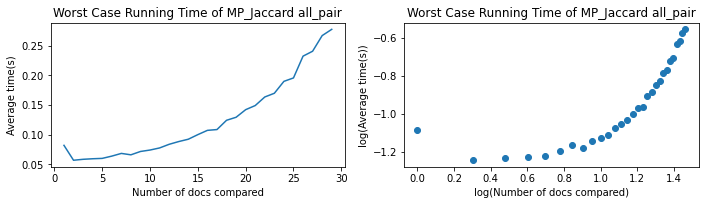

([1, 2, 3, 4, 5],
 [0.08211914698282878,
  0.05700413386027018,
  0.05860455830891927,
  0.05952270825703939,
  0.0601499875386556])

In [ ]:
draw_graph(m,p,'MP_Jaccard all_pair')

In [ ]:
slope_fun(m,p)

Slope is 0.007248261879230368 and intercept is 0.015474072818098386
log_Slope is 0.4718895794565229 and log_intercept is -3.371692229802158
slope_log rounded off to 0.4719
intercept_log rounded off to -3.3717


#### Comparing normal Jaccard all_sim with Mapreduce Jaccard all_sim

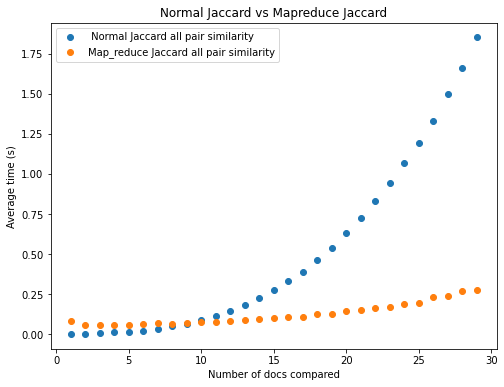

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(x1, y1)
plt.scatter(m, p)
plt.legend((' Normal Jaccard all pair similarity ','Map_reduce Jaccard all pair similarity'),loc='upper left')
plt.xlabel("Number of docs compared")
plt.ylabel("Average time (s)")
plt.title("Normal Jaccard vs Mapreduce Jaccard")
plt.show()

In [ ]:
'''From the above graph, it is evident that the run time of jaccard increases drastically with number of docs compared whereas Map_reduce Jaccard all pair similarity is kind of constant proving its efficiency.'''

'From the above graph, it is evident that the run time of jaccard increases drastically with number of docs compared whereas Map_reduce Jaccard all pair similarity is kind of constant proving its efficiency.'

In [ ]:
#calculating slope and intercept
import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x1), np.log(y1))
slope_np, intercept_np, r_value_np, p_value_np, std_err_np = stats.linregress(np.log(m), np.log(p))
print("Jaccard function Slope is {} and intercept is {}".format(slope,intercept))
print("Mapreduce_version Slope is {} and intercept is {}".format(slope_np,intercept_np))

Jaccard function Slope is 2.311038032004556 and intercept is -7.47394336294777
Mapreduce_version Slope is 0.4718895794565229 and intercept is -3.371692229802158


### Cosine(sparse) Map reduce version

In [ ]:
mc=[]  #contains input number of docs for all similarities
pc=[]  #contains mean time taken 
#try:

for i in range(1,20):
  mc.append(i)
  (ans,mean,error)=timeit(map_reduce_parallel,docdicts12[:i],mapper_parallel,reducer_parallel_cosine,repeats=3)
  pc.append(mean)

print(mc[:10],pc[:10])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.07973814010620117, 0.062494516372680664, 0.06252455711364746, 0.06378928820292155, 0.06656622886657715, 0.07106844584147136, 0.07752108573913574, 0.07561858495076497, 0.0849307378133138, 0.08929101626078288]


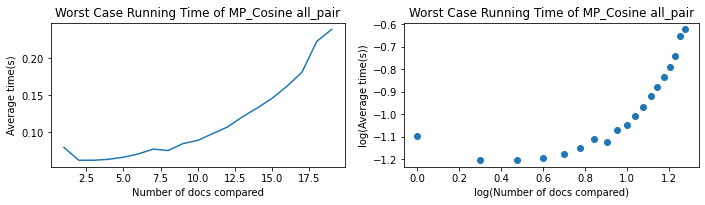

([1, 2, 3, 4, 5],
 [0.07973814010620117,
  0.062494516372680664,
  0.06252455711364746,
  0.06378928820292155,
  0.06656622886657715])

In [ ]:
draw_graph(mc,pc,'MP_Cosine all_pair')

In [ ]:
slope_fun(mc,pc)

Slope is 0.00875186794682553 and intercept is 0.025350052013731833
log_Slope is 0.41568029204221346 and log_intercept is -3.1377201565291575
slope_log rounded off to 0.4157
intercept_log rounded off to -3.1377


#### Comparing normal Cosine all_sim with Mapreduce Cosine all_sim

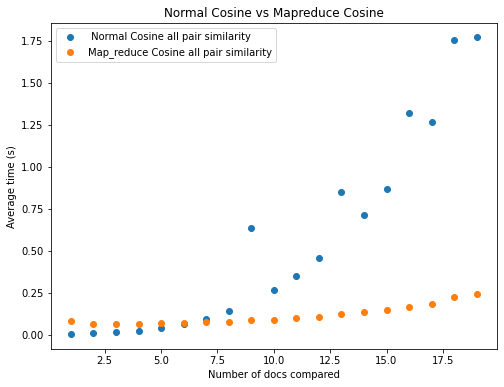

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(x2, y2)
plt.scatter(mc, pc)
plt.legend((' Normal Cosine all pair similarity ','Map_reduce Cosine all pair similarity'),loc='upper left')
plt.xlabel("Number of docs compared")
plt.ylabel("Average time (s)")
plt.title("Normal Cosine vs Mapreduce Cosine")
plt.show()

In [ ]:
'''From the above graph, it is evident that the run time of cosine also increases drastically with number of docs compared whereas Map_reduce cosine all pair similarity is kind of constant proving its efficiency.'''

'From the above graph, it is evident that the run time of cosine also increases drastically with number of docs compared whereas Map_reduce cosine all pair similarity is kind of constant proving its efficiency.'

In [ ]:
#calculating slope and intercept
import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x2), np.log(y2))
slope_np, intercept_np, r_value_np, p_value_np, std_err_np = stats.linregress(np.log(mc), np.log(pc))
print("Cosine function Slope is {} and intercept is {}".format(slope,intercept))
print("Mapreduce_version Slope is {} and intercept is {}".format(slope_np,intercept_np))

Cosine function Slope is 2.3800598173701544 and intercept is -6.604209697595408
Mapreduce_version Slope is 0.41568029204221346 and intercept is -3.1377201565291575


## Optimal results

In order to get the optimal results, an appropriate number of mappers and reducers should be assigned to the task.To find the appropriate number, here, I have calculated the runtimes of all pairs of mappers and reducers available for both jaccard and cosine.

From the results for both Jaccard and Cosine, when I used 1 mapper,4 reducer and 2 mappers,4 reducers I got the best runtime of around 0.30 seconds for jaccard similarity and 0.74 seconds for cosine similarity, all_pair similarities of 30 documents.

## Jaccard

In [ ]:
for i in range(1,5):
    for j in range(1,5):
        (ans,mean,error)=timeit(map_reduce_parallel,docdicts12[:30],mapper_parallel,reducer_parallel_jaccard,mapprocesses=i,reduceprocesses=j,repeats=3)
        print('Time taken when mappers= {}, reducers= {} is {}s'.format(i,j,mean))

Time taken when mappers= 1, reducers= 1 is 0.8333766460418701s
Time taken when mappers= 1, reducers= 2 is 0.4597795804341634s
Time taken when mappers= 1, reducers= 3 is 0.3871939977010091s
Time taken when mappers= 1, reducers= 4 is 0.30617205301920575s
Time taken when mappers= 2, reducers= 1 is 0.828335682551066s
Time taken when mappers= 2, reducers= 2 is 0.4592532316843669s
Time taken when mappers= 2, reducers= 3 is 0.3790277640024821s
Time taken when mappers= 2, reducers= 4 is 0.3021423816680908s
Time taken when mappers= 3, reducers= 1 is 0.8348356088002523s
Time taken when mappers= 3, reducers= 2 is 0.46793174743652344s
Time taken when mappers= 3, reducers= 3 is 0.3902897834777832s
Time taken when mappers= 3, reducers= 4 is 0.30625732739766437s
Time taken when mappers= 4, reducers= 1 is 0.8362589677174886s
Time taken when mappers= 4, reducers= 2 is 0.47123154004414874s
Time taken when mappers= 4, reducers= 3 is 0.8281073570251465s
Time taken when mappers= 4, reducers= 4 is 0.3188093

## Cosine

In [ ]:
for i in range(1,5):
    for j in range(1,5):
        (ans,mean,error)=timeit(map_reduce_parallel,docdicts12[:30],mapper_parallel,reducer_parallel_cosine,mapprocesses=i,reduceprocesses=j,repeats=3)
        print('Time taken when mappers= {}, reducers= {} is {}s'.format(i,j,mean))

Time taken when mappers= 1, reducers= 1 is 2.088525374730428s
Time taken when mappers= 1, reducers= 2 is 1.1439836025238037s
Time taken when mappers= 1, reducers= 3 is 0.9555777708689371s
Time taken when mappers= 1, reducers= 4 is 0.735028346379598s
Time taken when mappers= 2, reducers= 1 is 2.118299722671509s
Time taken when mappers= 2, reducers= 2 is 1.1894853115081787s
Time taken when mappers= 2, reducers= 3 is 0.951242208480835s
Time taken when mappers= 2, reducers= 4 is 0.7402479648590088s
Time taken when mappers= 3, reducers= 1 is 2.1034059524536133s
Time taken when mappers= 3, reducers= 2 is 1.183463493982951s
Time taken when mappers= 3, reducers= 3 is 0.9669702847798666s
Time taken when mappers= 3, reducers= 4 is 0.7612055142720541s
Time taken when mappers= 4, reducers= 1 is 2.056252638498942s
Time taken when mappers= 4, reducers= 2 is 1.195140282313029s
Time taken when mappers= 4, reducers= 3 is 0.9753230412801107s
Time taken when mappers= 4, reducers= 4 is 0.7741327285766602s

# Summary

1. The theoretical and empirical time complexities of Jaccard, Cosine, Cosine numpy.dot product version and, cosine sparse version algorithms are **O(n)**.
2. The numpy version of cosine outperforms own implemented cosine in case of larger inputs(documents with larger number of words).
3. The empirical values will be nearer to theoretical values when the input is significantly large causing  asymptomatic behaviour to kick in.
4. The cosine and jaccard all pair similarity for smaller number of documents is near to the order of 2.5 $𝑂(𝑛^{2.5})$, for larger number of documents it becomes 3, $O({n^3})$.
5. MapReduce parallel processing proves to be very efficient than normal algorithms, cutting the runtime to more than half. But, number of mappers and reducers should be carefully chosed for optimal results.
6. While choosing the number of mapper and reducers along with the efficiency, the cost associated with them should also be considered.

In [ ]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437
#Please run this cell in google colab for word count
import io
from nbformat import current

#filepath="/content/drive/My Drive/NLE Notebooks/assessment/assignment1.ipynb"
filepath="/content/drive/MyDrive/Colab Notebooks/Dec 5 ADS.ipynb"
question_count=100

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1992


In [ ]:
#run this cell if using google co-lab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
